In [9]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
#pylab.rcParams['figure.figsize'] = (60, 40)

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

import matplotlib.pyplot as plt

def plot_history(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss_values, 'bo')
    # b+ is for "blue crosses"
    plt.plot(epochs, val_loss_values, 'b+')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.clf() # clear figure
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'bo')
    plt.plot(epochs, val_acc_values, 'b+')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Populating the interactive namespace from numpy and matplotlib


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    verbose=0,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

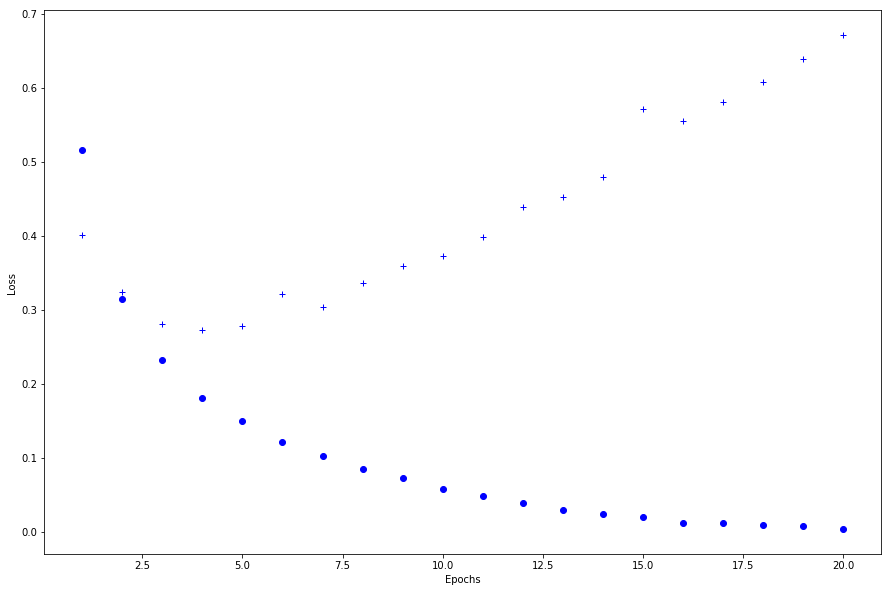

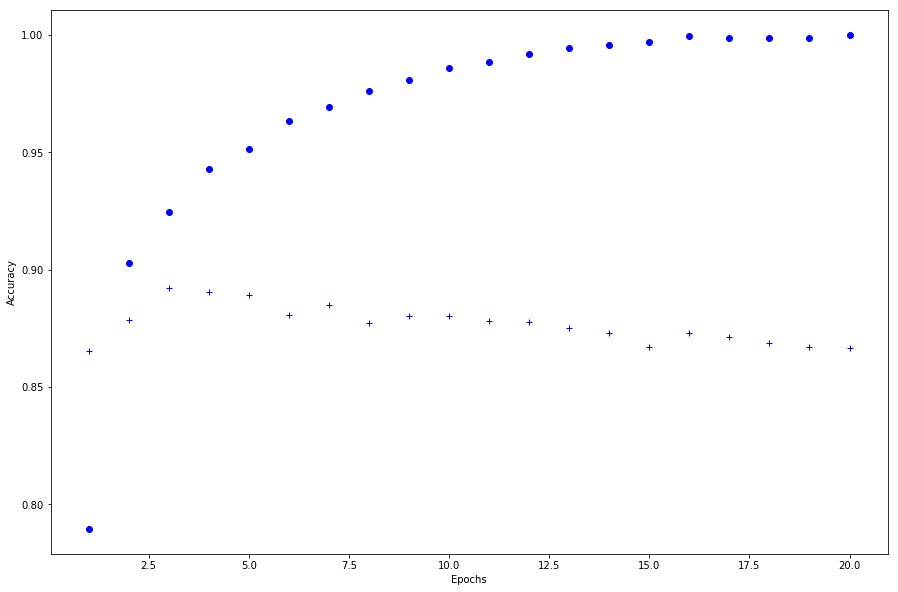

In [12]:
plot_history(history.history)

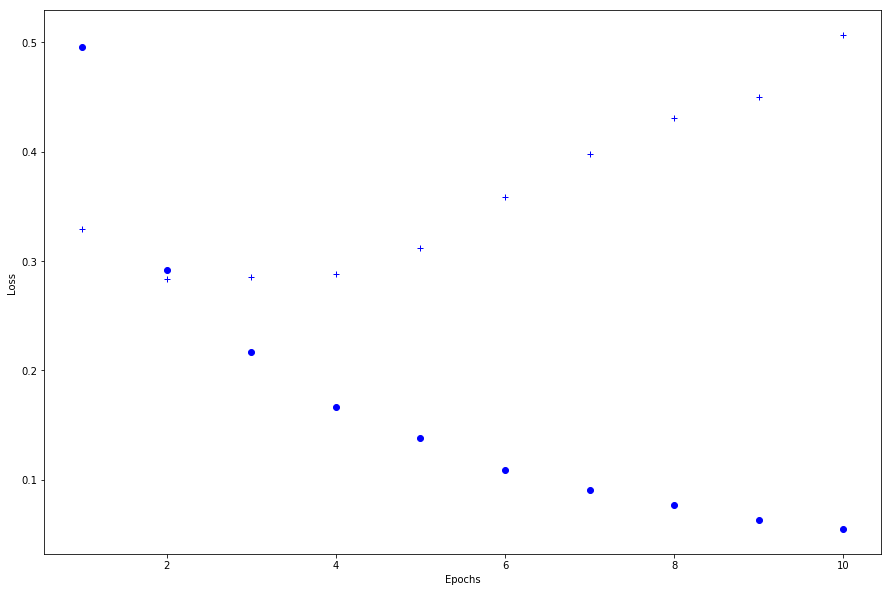

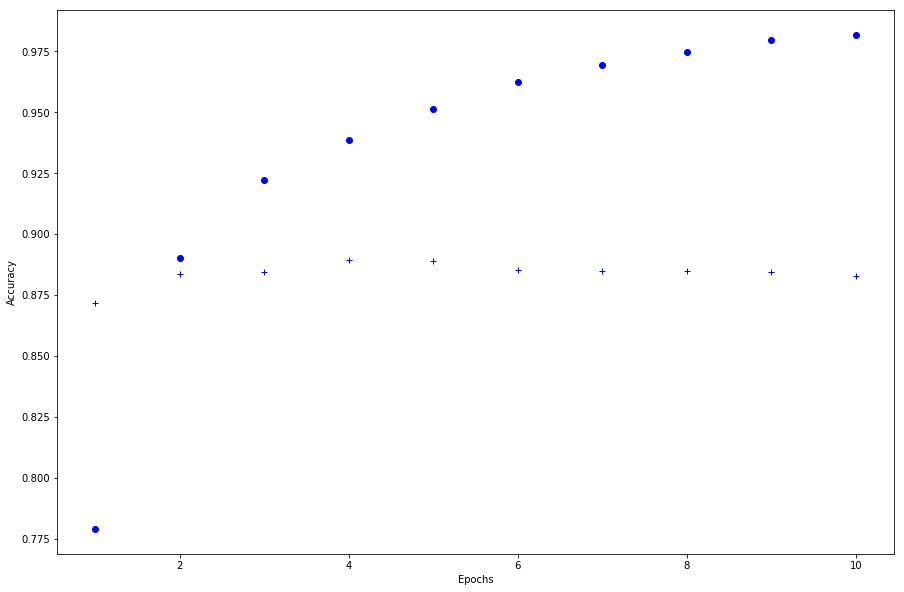

In [18]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    verbose=0,
                    epochs=10,
                    batch_size=256,
                    validation_data=(x_val, y_val))

plot_history(history.history)